In [1]:
# import all the dependencies 
import pandas as pd
import numpy as np
%matplotlib inline

# plot appears inside the notebook
import matplotlib.pyplot as plt
import seaborn as sns

# import Models from Sckit-Learn 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_roc_curve, roc_auc_score

In [2]:
lucene = pd.read_excel("lucene.xlsx")
lucene

,name,version,name.1,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,lucene,2.4,org.apache.lucene.index.DocInverterPerThread,5,2,0,19,18,0,8,...,0.000000,7,0.500000,0.400000,0,0,14.400000,3,1.2000,1
1,lucene,2.4,org.apache.lucene.search.FuzzyQuery,10,3,0,13,41,7,1,...,0.500000,0,0.720000,0.285714,2,6,27.200000,6,1.4000,1
2,lucene,2.4,org.apache.lucene.search.QueryTermVector,10,1,0,4,38,0,0,...,1.000000,0,0.000000,0.340000,0,0,27.500000,5,1.6000,0
3,lucene,2.4,org.apache.lucene.index.ReadOnlySegmentReader,4,4,0,3,7,6,2,...,0.000000,0,0.981250,0.500000,2,3,5.500000,3,1.2500,0
4,lucene,2.4,org.apache.lucene.index.DirectoryIndexReader,25,2,2,20,82,160,5,...,0.833333,5,0.768421,0.197917,2,8,22.360000,3,1.0800,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,lucene,2.4,org.apache.lucene.analysis.StopFilter,13,3,0,6,29,38,2,...,0.600000,1,0.466667,0.285714,1,2,12.307692,1,0.6154,1
336,lucene,2.4,org.apache.lucene.util.ScorerDocQueue,16,1,0,3,24,0,2,...,1.000000,2,0.000000,0.328125,0,0,21.312500,7,1.7500,1
337,lucene,2.4,org.apache.lucene.search.DefaultSimilarity,7,2,0,3,10,21,3,...,0.000000,0,0.714286,0.500000,1,2,6.714286,1,0.8571,0
338,lucene,2.4,org.apache.lucene.index.TermsHashPerThread,10,2,0,24,37,7,9,...,0.000000,8,0.333333,0.188889,0,0,25.400000,4,1.4000,0


In [3]:
np.random.seed(10)
luc_X = lucene.drop(columns=["name.1","name","version","bug"] ,axis=1)
Xtest = luc_X.iloc[:247]
# Xtrain
Xtest

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,5,2,0,19,18,0,8,15,4,0.785714,84,0.000000,7,0.500000,0.400000,0,0,14.400000,3,1.2000
1,10,3,0,13,41,7,1,12,9,0.638889,286,0.500000,0,0.720000,0.285714,2,6,27.200000,6,1.4000
2,10,1,0,4,38,0,0,4,9,0.388889,287,1.000000,0,0.000000,0.340000,0,0,27.500000,5,1.6000
3,4,4,0,3,7,6,2,2,1,2.000000,26,0.000000,0,0.981250,0.500000,2,3,5.500000,3,1.2500
4,25,2,2,20,82,160,5,18,8,0.881944,596,0.833333,5,0.768421,0.197917,2,8,22.360000,3,1.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,11,1,0,10,44,1,2,8,0,0.719048,658,0.523810,7,0.000000,0.366667,0,0,56.909091,7,1.2727
243,8,2,0,3,15,0,1,2,0,0.571429,158,1.000000,0,0.562500,0.425000,1,3,17.875000,1,0.8750
244,16,2,1,22,53,0,2,21,14,0.466667,577,1.000000,1,0.605263,0.231250,1,5,34.875000,6,1.2500
245,13,2,0,11,39,0,4,7,4,0.761111,394,0.533333,6,0.294118,0.211538,1,2,28.153846,1,0.9231


In [4]:
np.random.seed(10)
# turning the dataset to an array
luc_y = lucene["bug"]
a = luc_y.iloc[:247]
ytest = a
# a
ytest



0      1
1      1
2      0
3      0
4      1
      ..
242    1
243    0
244    1
245    0
246    1
Name: bug, Length: 247, dtype: int64

In [5]:
np.random.seed(17)
lucene2 = pd.read_excel("lunce_2.xls")
lucene2

,name,version,name33,wmc,dit,noc,cbo,rfc,lcom,ca,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,lucene,2.2,org.apache.lucene.search.FuzzyQuery,10,3,0,13,42,7,1,...,0.500000,0,0.720000,0.285714,3,4,26.600000,6,1.4000,1
1,lucene,2.2,org.apache.lucene.index.MultiLevelSkipListReader,10,1,1,4,21,0,1,...,1.000000,1,0.000000,0.500000,0,0,45.300000,2,1.0000,1
2,lucene,2.2,org.apache.lucene.store.RAMDirectory,17,2,0,11,42,0,2,...,0.333333,0,0.586207,0.352941,1,5,21.941176,2,0.8824,1
3,lucene,2.2,org.apache.lucene.search.spans.SpanQuery,5,2,5,17,7,10,12,...,0.000000,0,0.750000,0.466667,1,1,1.800000,1,0.8000,0
4,lucene,2.2,org.apache.lucene.index.TermPositions,4,1,0,23,4,6,22,...,0.000000,0,0.000000,0.500000,0,0,0.000000,1,1.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,lucene,2.2,org.apache.lucene.search.Explanation,13,1,1,41,21,64,41,...,1.000000,0,0.000000,0.292308,0,0,13.923077,4,1.4615,0
243,lucene,2.2,org.apache.lucene.index.FieldReaderException,4,4,0,1,8,6,1,...,0.000000,0,1.000000,0.666667,0,0,4.000000,0,0.0000,0
244,lucene,2.2,org.apache.lucene.index.FieldInfo,1,1,0,8,2,0,8,...,0.000000,0,0.000000,1.000000,0,0,27.000000,0,0.0000,1
245,lucene,2.2,org.apache.lucene.search.HitIterator,5,1,0,2,10,0,1,...,1.000000,1,0.000000,0.600000,0,0,10.600000,2,1.2000,1


In [6]:
# this is the X DATA for lucence2.2
np.random.seed(17)
lucX = lucene2.drop(columns=["name33","name","version","bug"] ,axis=1)
lucX

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,10,3,0,13,42,7,1,12,9,0.638889,280,0.500000,0,0.720000,0.285714,3,4,26.600000,6,1.4000
1,10,1,1,4,21,0,1,3,1,0.619048,477,1.000000,1,0.000000,0.500000,0,0,45.300000,2,1.0000
2,17,2,0,11,42,0,2,10,15,0.562500,393,0.333333,0,0.586207,0.352941,1,5,21.941176,2,0.8824
3,5,2,5,17,7,10,12,6,4,2.000000,14,0.000000,0,0.750000,0.466667,1,1,1.800000,1,0.8000
4,4,1,0,23,4,6,22,1,4,2.000000,4,0.000000,0,0.000000,0.500000,0,0,0.000000,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,13,1,1,41,21,64,41,0,11,0.611111,197,1.000000,0,0.000000,0.292308,0,0,13.923077,4,1.4615
243,4,4,0,1,8,6,1,0,4,2.000000,20,0.000000,0,1.000000,0.666667,0,0,4.000000,0,0.0000
244,1,1,0,8,2,0,8,0,0,2.000000,36,0.000000,0,0.000000,1.000000,0,0,27.000000,0,0.0000
245,5,1,0,2,10,0,1,2,4,0.375000,60,1.000000,1,0.000000,0.600000,0,0,10.600000,2,1.2000


In [7]:
np.random.seed(17)
Xtrain = lucX
Xtrain

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,10,3,0,13,42,7,1,12,9,0.638889,280,0.500000,0,0.720000,0.285714,3,4,26.600000,6,1.4000
1,10,1,1,4,21,0,1,3,1,0.619048,477,1.000000,1,0.000000,0.500000,0,0,45.300000,2,1.0000
2,17,2,0,11,42,0,2,10,15,0.562500,393,0.333333,0,0.586207,0.352941,1,5,21.941176,2,0.8824
3,5,2,5,17,7,10,12,6,4,2.000000,14,0.000000,0,0.750000,0.466667,1,1,1.800000,1,0.8000
4,4,1,0,23,4,6,22,1,4,2.000000,4,0.000000,0,0.000000,0.500000,0,0,0.000000,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,13,1,1,41,21,64,41,0,11,0.611111,197,1.000000,0,0.000000,0.292308,0,0,13.923077,4,1.4615
243,4,4,0,1,8,6,1,0,4,2.000000,20,0.000000,0,1.000000,0.666667,0,0,4.000000,0,0.0000
244,1,1,0,8,2,0,8,0,0,2.000000,36,0.000000,0,0.000000,1.000000,0,0,27.000000,0,0.0000
245,5,1,0,2,10,0,1,2,4,0.375000,60,1.000000,1,0.000000,0.600000,0,0,10.600000,2,1.2000


In [8]:
# turning the dataset to an array
np.random.seed(17)
lucy = lucene2["bug"]
# a = lucy.iloc[:].values
# ytest = a
ytrain = lucy
ytrain



0      1
1      1
2      1
3      0
4      1
      ..
242    0
243    0
244    1
245    1
246    1
Name: bug, Length: 247, dtype: int64

In [9]:
#  the data has been been split , we can train our model into 
from sklearn.ensemble import RandomForestClassifier
model = {"RandomForest": RandomForestClassifier(n_estimators=95,
                                                min_samples_split=2,
                                                max_depth=None,
                                                min_samples_leaf=2,
                                                n_jobs=10)}

# Create a function to fit and score model
def fit_and_score(model, X_train, X_test, y_train, y_test):
    """
    This method is used:
    To fit and evaluate a machine learning algorithm RandomForestClassifier.
    X_train: training data (The bug column was removed)
    X_test: It contains the label to be used for testing the model
    y_train: training label of the bug_column
    y_test: test label of the bug_column
    """
    # set the random seed 
    np.random.seed(10)
    model_score = {}
    model_score_train =[]
    for name , model in model.items():
        model.fit(X_train, y_train, sample_weight=np.where(y_train==0,1.5,1))
        y_preds = model.predict(X_test)
        a = model.score(X_train, y_train)
        pred = model.predict_proba(X_train)
        #Evaluate the model and append it score to model_score
        model_score_train.append(a)
        # this is the probability of estimates
        roc = roc_auc_score(y_test, pred[:, 1])
        model_score_train.append(roc)
        print(classification_report(ytest,y_preds))
        model_score[name] = model.score(X_test, y_test)
        
        return model_score, model_score_train  
        
    sns.set(font_scale=1.5) # increase the font size of the graph

    def plot_conf_matrix(y_test, y_preds):
        fig , ax = plt.subplots(figsize=(5,5))
        ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                  annot=True, #this is for box annotation
                  cbar=False) 
    
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
 
       
    
        
        
    return model_scores,  model_score_train, plot_conf_matrix(ytest,y_preds)

       

In [10]:
model_score = fit_and_score(model, X_train=Xtrain , X_test=Xtest, y_train=ytrain, y_test=ytest)
model_score

              precision    recall  f1-score   support

           0       0.52      0.47      0.49       104
           1       0.64      0.69      0.66       143

    accuracy                           0.60       247
   macro avg       0.58      0.58      0.58       247
weighted avg       0.59      0.60      0.59       247



({'RandomForest': 0.5951417004048583}, [0.979757085020243, 0.4579747175901022])

In [11]:
# Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got netwon-cg.

In [12]:
#Create a hyperparameter turning using randomisedCV for RandomForestClassifier
lucene_grid = {"n_estimators": np.arange(5,150,10), #number of trees
              "max_depth": [None, 2, 5, 10], # depth of trees
              "min_samples_split": np.arange(2, 30, 2),#split an internal node into features
              "min_samples_leaf":np.arange(2, 30, 2), # #samples required to be at a leaf node
               "class_weight": [None, {0:1, 0:1.5}, {0:1, 1:10}]
              }    
lucene_rf_grid = GridSearchCV(RandomForestClassifier(),n_jobs=10,
                             param_grid=lucene_grid,
                             cv=5,
                             verbose=True)


# fit grid hyperparamter search model
lucene_rf_grid.fit(Xtest,ytest)

Fitting 5 folds for each of 35280 candidates, totalling 176400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'class_weight': [None, {0: 1.5}, {0: 1, 1: 10}],
                         'max_depth': [None, 2, 5, 10],
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'n_estimators': array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145])},
             verbose=True)

In [13]:
lucene_rf_grid.best_params_

{'class_weight': None,
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 22,
 'n_estimators': 5}

In [14]:
lucene_rf_grid.score(Xtest, ytest)

0.8137651821862348

In [15]:
#predict on the test dataset
lucene_preds = lucene_rf_grid.predict(Xtest)
lucene_preds.shape

(247,)

In [16]:
#putting the best parameters into a list
lucene_best_params = pd.DataFrame([lucene_rf_grid.best_params_])
lucene_best_params

,class_weight,max_depth,min_samples_leaf,min_samples_split,n_estimators
0,None,None,2,22,5


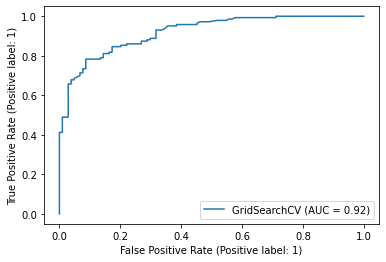

In [17]:
plot_roc_curve(lucene_rf_grid, Xtest, ytest);

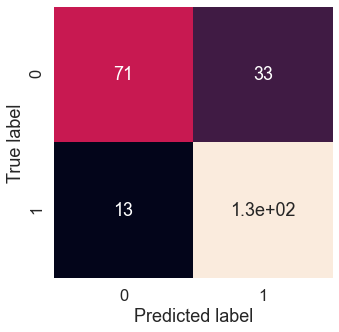

In [19]:
# Confusion Matrix
# confusion matrix function
import seaborn as sns

sns.set(font_scale=1.5) # increase the font size of the graph

def plot_conf_matrix(y_test, lucene_preds):
    """
    plot a confusion matrix using seasborn's heatmap
    """
    
    fig , ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, lucene_preds),
                  annot=True, #this is for box annotation
                  cbar=False) 
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_matrix(ytest, lucene_preds)
    
#x-axis = model predictions
# y_axis = true labels

In [21]:
print(classification_report(ytest, lucene_preds))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       104
           1       0.80      0.91      0.85       143

    accuracy                           0.81       247
   macro avg       0.82      0.80      0.80       247
weighted avg       0.82      0.81      0.81       247



In [22]:
#Calculate evaluation metrics using cross val score
lucene_new_rf = RandomForestClassifier(n_estimators= 5,max_depth=None,
                                       min_samples_leaf= 2,
                                       min_samples_split=22,
                                       class_weight=None)
lucene_new_rf      

RandomForestClassifier(min_samples_leaf=2, min_samples_split=22, n_estimators=5)

In [23]:
# value of cross-validated f1_score

def calculate_cross_val_score(new_rf, X, y):
    """
    Calculate the cross validation score across precision,
    precision
    
    """
    cv_accuracy = cross_val_score(new_rf, luc_X, y, cv=5, scoring="accuracy")
    acc_mean = cv_accuracy.mean()
    
    cv_precision = cross_val_score(new_rf, X, y,cv=5, scoring="precision")
    precision_mean = cv_precision.mean()
    
    cv_recall = cross_val_score(new_rf, X, y,cv=5,scoring="recall")
    recall_mean = cv_recall.mean()
    
    
    cv_f1 = cross_val_score(new_rf, X, y,cv=5, scoring="f1")
    f1 = cv_f1.mean()
    return acc_mean, precision_mean, recall_mean, f1

calculate_cross_val_score(lucene_new_rf,luc_X, luc_y)

df = pd.DataFrame(calculate_cross_val_score(lucene_new_rf,luc_X, luc_y))
df.rename(columns={0: "mean_values_metrics"}, index={0: "acc_mean ", 1: "precision_mean", 2: "recall_mean", 3 : "f1"})




,mean_values_metrics
acc_mean,0.682353
precision_mean,0.719404
recall_mean,0.798415
f1,0.734777


In [25]:
# finding feature importance
import time
import numpy as np
start_time = time.time()
lucene_new_rf.fit(luc_X,luc_y)
importances = lucene_new_rf.feature_importances_
feature_names = luc_X.columns
print(feature_names)

std = np.std([
    tree.feature_importances_ for tree in lucene_new_rf.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Index(['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3',
       'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc',
       'avg_cc'],
      dtype='object')
Elapsed time to compute the importances: 0.022 seconds


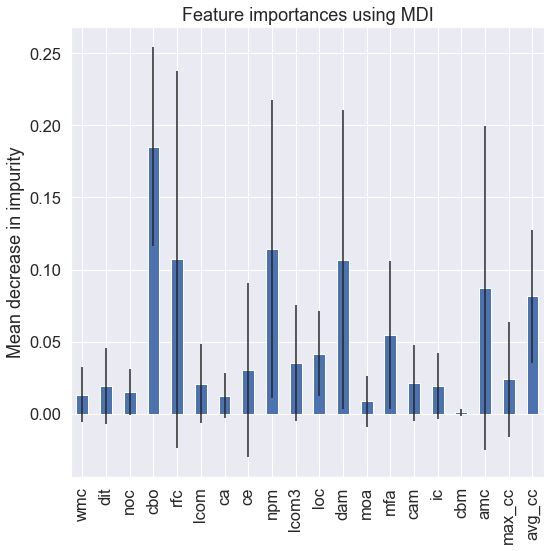

In [26]:
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(8,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()